# Fraud Detection in Financial Transactions

In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set(style = "whitegrid")

In [5]:
# Load the dataset

df = pd.read_csv (r"C:\Users\hatka\OneDrive\Desktop\Fraud detection in financial transactions\AIML Dataset.csv")

In [6]:
 df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
# Get summary statistics of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
df["isFraud"].value_counts()

isFraud
0    1047433
1       1142
Name: count, dtype: int64

In [10]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    1048575
Name: count, dtype: int64

In [11]:
# Identify high-risk transactions

high_risk_txns = df[(df['isFraud'] == 1) | (df['isFlaggedFraud'] == 1)]
print("High-Risk Transactions:")
display(high_risk_txns.head())

High-Risk Transactions:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [12]:
# Extract user IDs involved

high_risk_users = pd.unique(high_risk_txns[['nameOrig', 'nameDest']].values.ravel())
print(f"Number of unique users involved in high-risk transactions: {len(high_risk_users)}")

Number of unique users involved in high-risk transactions: 2274


In [13]:
# Handle missing values

df.isnull().sum().sum()

0

In [14]:
df.shape[0]

1048575

In [15]:
 round((df["isFraud"].value_counts()[1]/df.shape[0])*100,2)

0.11

# Exploratory Data Analysis (EDA) 

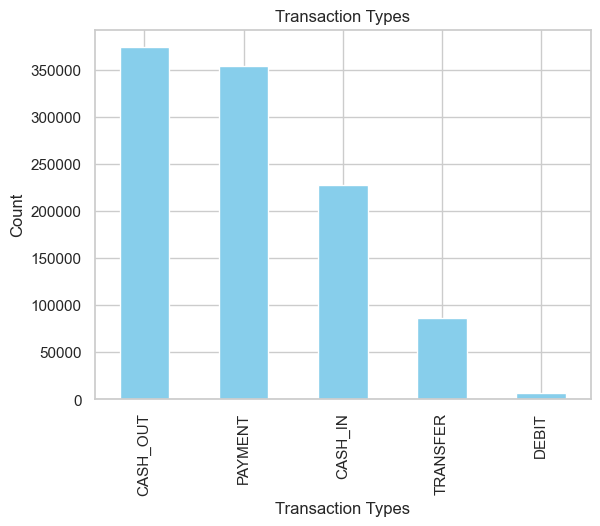

In [17]:
# 📊 Bar Plot of Transaction Types

df["type"].value_counts().plot(kind="bar", title="Transaction Types", color="skyblue")
plt.xlabel("Transaction Types")
plt.ylabel("Count")
plt.show()

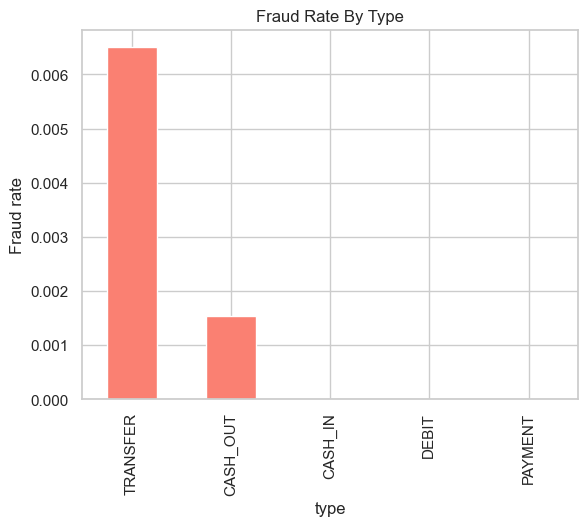

In [18]:
# 🚨 Fraud Rate by Transaction Type

fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending = False)
fraud_by_type.plot(kind = "bar", title = "Fraud Rate By Type", color = "salmon")
plt.ylabel("Fraud rate")
plt.show()

In [19]:
# Get summary statistics of the dataset

df["amount"].describe().astype(int)

count     1048575
mean       158666
std        264940
min             0
25%         12149
50%         76343
75%        213761
max      10000000
Name: amount, dtype: int32

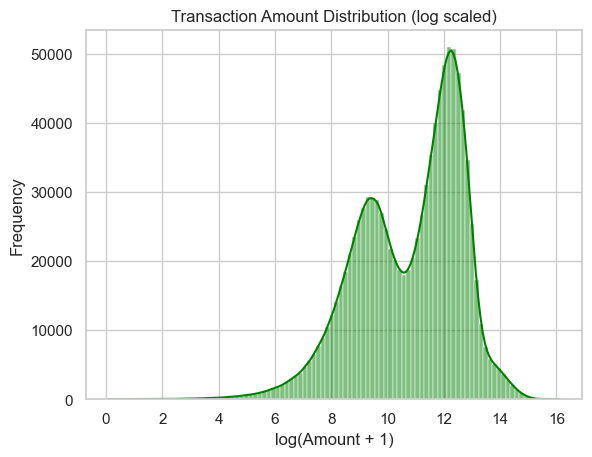

In [20]:
# 💰 Distribution of Transaction Amounts (Log Scaled)

sns.histplot(np.log1p(df["amount"]), bins=100, kde=True, color="green")
plt.title("Transaction Amount Distribution (log scaled)")
plt.xlabel("log(Amount + 1)")
plt.ylabel("Frequency")
plt.show()

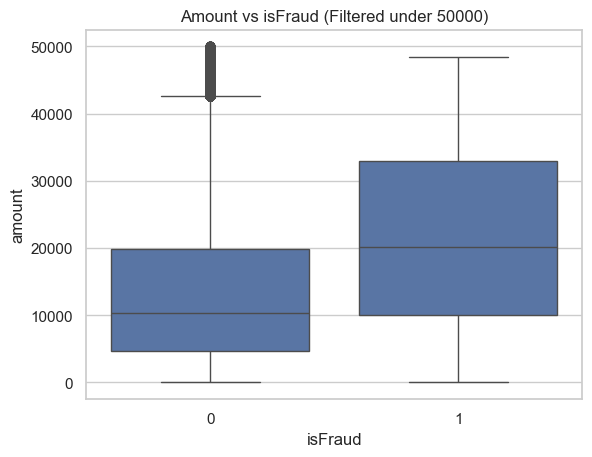

In [21]:
# 📦 Boxplot of Transaction Amounts by Fraud Status (Amount < 50,000)

sns.boxplot(data=df[df["amount"] < 50000], x="isFraud", y="amount")
plt.title("Amount vs isFraud (Filtered under 50000)")
plt.show()

In [22]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [23]:
df["balanceDifforig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [24]:
(df["balanceDifforig"] < 0).sum()

221805

In [25]:
(df["balanceDiffDest"] < 0).sum()

203566

In [26]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDifforig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


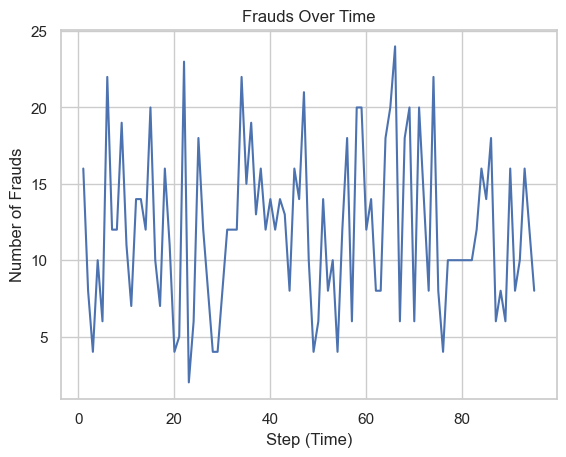

In [27]:
# ⏱️ Trend of Fraudulent Transactions Over Time

frauds_per_step = df [df ["isFraud"] == 1] ["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index ,frauds_per_step.values, label="Frauds per Step")
plt.xlabel("Step (Time)")
plt.ylabel("Number of Frauds")
plt.title("Frauds Over Time")
plt.grid(True)
plt.show()

In [28]:
df.drop(columns = "step", inplace= True)

In [29]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDifforig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [30]:
top_sender =df ["nameOrig"].value_counts().head(10)

In [31]:
top_sender

nameOrig
C1214450722    2
C309111136     2
C1268675361    2
C720460198     2
C1109092856    2
C545402485     2
C1362689728    2
C110179857     2
C1467095135    2
C2073023524    2
Name: count, dtype: int64

In [32]:
top_receivers = df ["nameDest"].value_counts().head(10)

In [33]:
top_receivers

nameDest
C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
C2083562754    86
C977993101     82
C1360767589    81
C451111351     80
C306206744     79
Name: count, dtype: int64

In [34]:
fraud_users = df[df ["isFraud"] == 1]["nameOrig"].value_counts().head(10)

In [35]:
fraud_users

nameOrig
C1305486145    1
C1776675634    1
C289101217     1
C1116093088    1
C1795901064    1
C1422133318    1
C1694539503    1
C1198248537    1
C1837436553    1
C1422380255    1
Name: count, dtype: int64

In [36]:
fraud_types = df[df ["type"].isin(["TRANSFER","CASH_OUT"])]

In [37]:
fraud_types["type"].value_counts()

type
CASH_OUT    373641
TRANSFER     86753
Name: count, dtype: int64

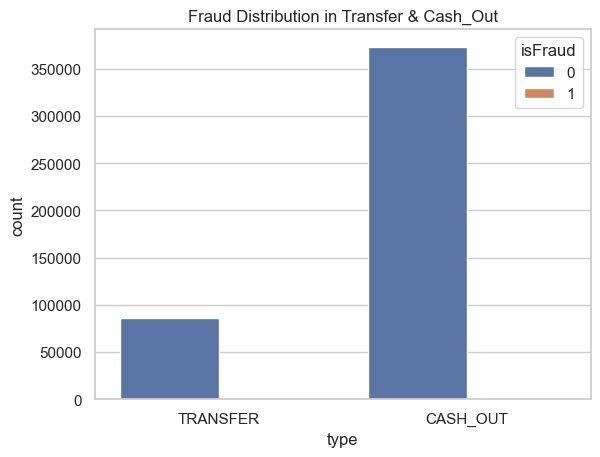

In [38]:
# 🔄 Fraud Distribution in TRANSFER and CASH_OUT Transactions

sns.countplot(data=fraud_types, x="type", hue="isFraud")
plt.title("Fraud Distribution in Transfer & Cash_Out")
plt.show()

In [39]:
corr = df[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud"]].corr()

In [40]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862
oldbalanceOrg,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829
newbalanceOrig,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438
oldbalanceDest,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552
newbalanceDest,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495
isFraud,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000


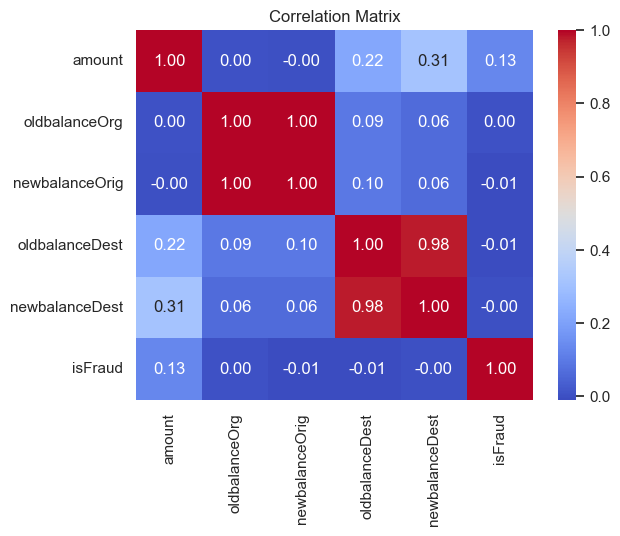

In [41]:
# 📈 Correlation Matrix of Features

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [42]:
zero_after_transfer = df [
(df ["oldbalanceOrg"] > 0) &
(df ["newbalanceOrig"] == 0) &
(df["type"].isin(["TRANSFER", "CASH_OUT"]))
]

In [43]:
len(zero_after_transfer)

192858

In [44]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDifforig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [45]:
df["isFraud"].value_counts()

isFraud
0    1047433
1       1142
Name: count, dtype: int64

In [46]:
# Risk Score Summary

def compute_risk_score(row):
    score = 0
    if row['isFraud'] == 1:
        score += 70
    if row['isFlaggedFraud'] == 1:
        score += 30
    return score

high_risk_txns['riskScore'] = high_risk_txns.apply(compute_risk_score, axis=1)
summary = high_risk_txns.groupby('nameOrig').agg(
    total_amount=('amount', 'sum'),
    average_risk_score=('riskScore', 'mean'),
    transactions_count=('riskScore', 'count')
).sort_values(by='average_risk_score', ascending=False)


print("High-Risk Transaction Summary by Sender (nameOrig):")
display(summary.head(10))


High-Risk Transaction Summary by Sender (nameOrig):


,total_amount,average_risk_score,transactions_count
nameOrig,,,
C1000086512,33676.59,70.0,1
C378412722,9039246.82,70.0,1
C383882703,60726.57,70.0,1
C383717053,262434.54,70.0,1
C383698470,103056.00,70.0,1
C383165349,9748.89,70.0,1
C378910639,212089.74,70.0,1
C378617827,304085.48,70.0,1
C374179954,387952.42,70.0,1


# Model Building

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [49]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDifforig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [50]:
df_model = df.drop(["nameOrig","nameDest","isFlaggedFraud"],axis=1)

In [51]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDifforig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [52]:
categorical = ["type"]
numeric = ["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

In [53]:
y = df_model["isFraud"]
x = df_model.drop("isFraud", axis=1)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3,stratify=y)

In [55]:
preprocessor = ColumnTransformer(
    transformers= [
        ('num', StandardScaler(), numeric),
        ('cat', OneHotEncoder(drop = "first"), categorical)
    ],
    remainder="drop"  
)

In [56]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegression(class_weight="balanced", max_iter=1000))
])

In [57]:
# Train the machine learning model

pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [58]:
# Predict on test data

y_pred = pipeline.predict(X_test)

In [59]:
# Evaluate model performance

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    314230
           1       0.02      0.97      0.03       343

    accuracy                           0.94    314573
   macro avg       0.51      0.96      0.50    314573
weighted avg       1.00      0.94      0.97    314573



In [60]:
confusion_matrix(y_test,y_pred)

array([[294594,  19636],
       [     9,    334]], dtype=int64)

In [61]:
pipeline.score(X_test,y_test) *100

93.7550266551802

In [62]:
import joblib
joblib.dump(pipeline, "model.pkl")

['model.pkl']